http://3ms.huawei.com/km/groups/3803117/blogs/details/11926207?l=zh-cn

某运营商客户基于其通讯能力提供了地震预警服务，假设视某地震多发区域为一个正方形地图，如下所示：

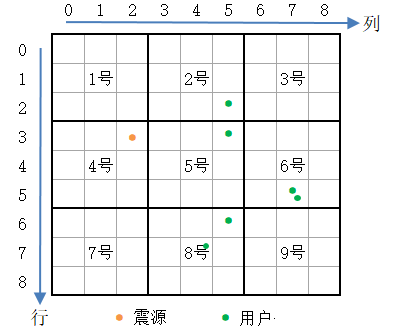

- 区域左上角单元格位置为[0, 0]
- 为方便管理，把区域划分为若干个大小相同的栅格Grid（也是正方形），从左到右、从上到下依次编号为1，2，3… n
- 单元格边长为 1 。左图的地图边长为 9，栅格边长为 3

当发生地震时（震源是区域内某个单元格），地震预警按照如下通知模型通知用户：

- 以栅格为单位进行通知，仅通知「栅格通知范围」为指定值radius内（含）、且有用户的栅格；

「栅格通知范围」：栅格中心点与震源点之间的曼哈顿距离。现约定栅格边长为奇数，即必有一个单元格作为栅格中心点；

- 按照栅格通知范围由近及远依次通知栅格内用户；
- 栅格通知范围相同时，优先通知栅格用户量较多的；
- 栅格用户量也相同时，优先通知栅格编号较小的。

现已知震源位置以及区域内所有用户位置，请按照通知模型依次输出通知的栅格编号。

输入

首行三个正整数 mapSideLen gridSideLen radius，分别表示地图边长、栅格边长、栅格通知范围

- 1 <= gridSideLen <= mapSideLen <= 8192，输入保证gridSideLen为奇数
- 1 <= radius <= 16000
- mapSideLen 是 gridSideLen 的整数倍

- 第二行两个整数row col，表示震源发生的单元格位置
- 第三行一个整数 usersNum，表示用户数，1 <= usersNum <= 1000
- 接下来 usersNum 行，每行两个整数，表示一个用户所在单元格位置
- 一个单元格内可以有多个用户。

输出

一个整数序列，表示待通知的栅格编号。如果没有符合条件的栅格，请输出空序列 []

样例

输入样例 1

```
9 3 6
3 2

6

3 5
7 4
6 5
5 7
2 5
5 7
```

 输出样例 1

[5 2 6 8]

提示样例 1

输入数据表示的内容参考上图：
与震源距离小于等于通知范围6的栅格编号为1、2、4、5、6、7、8 号；其中有用户的栅格为 2、5、6、8号，与震源的曼哈顿距离分别为 4、3、6、6。
首先按由近及远通知，先通知5号、2号；对于6号和8号，依次比较距离和用户数，都相同，则按栅格编号从小到大先通知 6号。
输入样例 2

```
3 1 3
0 0
1
2 2
```
输出样例 2

[]
提示样例 2
没有符合条件的栅格，输出空序列
提示：点P1位置(x1,y1)与点P2坐标(x2,y2)曼哈顿距离=|x1-x2|+|y1-y2|

In [ ]:
from leetcode import *
from collections import defaultdict

In [ ]:
class Solution:
    def __init__(self):
        self.grid_dict = defaultdict(list)
        self.grid_num = {}

    def warm_up(self, mapside_len: int, gridside_len: int, user_array: List[List[int]],
                half_gridside_len: int):
        n = mapside_len // gridside_len
        for i in range(n):
            for j in range(n):
                # 接下来把用户塞进去
                center = (gridside_len * i + half_gridside_len, gridside_len * j + half_gridside_len)
                temp = []
                for user in user_array:
                    if abs(user[0] - center[0]) <= half_gridside_len and abs(user[1] - center[1]) <= half_gridside_len:
                        self.grid_dict[center].append(user)
                    else:
                        temp.append(user)
                user_array = temp
                self.grid_num[center] = i * n + j + 1

    def get_notification_order(self, mapside_len: int, gridside_len: int, radius: int, earthquake_row: int,
                               earthquake_col: int, user_array: List[List[int]]) -> List[int]:
        # 栅格半长
        half_gridside_len = (gridside_len - 1) // 2
        self.warm_up(mapside_len, gridside_len, user_array, half_gridside_len)
        # 确定通知范围
        note_grid = {}
        for center in self.grid_dict.keys():
            lens = abs(earthquake_row - center[0]) + abs(earthquake_col - center[1])
            if lens <= radius and len(self.grid_dict[tuple(center)]):
                note_grid[center] = lens
        if note_grid:
            final_list = []
            for center in self.grid_dict:
                # 距离，用户数，编号
                final_list.append([note_grid[center], len(self.grid_dict[center]), self.grid_num[center]])
            final_list.sort()
            return [x[-1] for x in final_list]
        else:
            return []


In [ ]:
mapside_len, gridside_len, radius = 9, 3, 6
earthquake_row, earthquake_col = 3, 2
user_array = [[3, 5], [7, 4], [6, 5], [5, 7], [2, 5], [5, 7]]

In [ ]:
mapside_len, gridside_len, radius = 3,1,3
earthquake_row, earthquake_col = 0,0
user_array = [[2,2]]

In [ ]:
sol = Solution()
sol.get_notification_order(mapside_len, gridside_len, radius, earthquake_row, earthquake_col, user_array)

[]